# Unsupervised Learning

Unsupervised learning is a branch of machine learning where the data has no explicit labels or targets. The goal is to discover hidden patterns, groupings, or structure in the data. Unlike supervised learning, where the model learns from labeled examples, unsupervised learning works with raw, unlabeled data.

## Why Unsupervised Learning?
- **Abundance of Unlabeled Data:** Most real-world data is unlabeled (e.g., images, text, sensor data).
- **Exploratory Data Analysis:** Helps understand the structure and distribution of data before applying other methods.
- **Data Compression:** Reduces dimensionality for storage, visualization, or faster computation.
- **Noise Reduction:** Removes irrelevant or redundant features.
- **Preprocessing:** Can improve the performance of supervised learning by extracting useful features or reducing noise.
- **Novelty/Anomaly Detection:** Finds unusual patterns or outliers.
- **Generative Modeling:** Learns to generate new data samples similar to the input data.

## Types of Unsupervised Learning
- **Clustering:** Grouping similar data points together (e.g., customer segmentation).
- **Dimensionality Reduction:** Reducing the number of features while preserving important information (e.g., PCA, t-SNE).
- **Anomaly Detection:** Identifying rare or unusual data points (e.g., fraud detection).
- **Association Rule Mining:** Discovering interesting relationships between variables (e.g., market basket analysis).
- **Density Estimation:** Estimating the probability distribution of data (e.g., Gaussian Mixture Models).
- **Generative Modeling:** Learning to generate new data (e.g., GANs, VAEs).

---

## Supervised vs. Unsupervised Learning
- **Supervised Learning:**
    - Labeled observations: Each observation is a tuple (x, y) of feature vector x and output label y which are related according to an unknown function f (x) = y.
    - During training: Use the labeled observations to learn the relationship between x and y , i.e., find a function (or model) h(x) that best fits the observations
    - Goal: Ensure that the learned model h(x) accurately predicts the output label of a previously unseen, test feature input (generalization)
    - Labels : 'Teachers' during training, and 'validator' of results during testing
- **Unsupervised Learning:**
    - Unlabeled data set of feature vectors
    - Goal: Find structure, patterns, or groupings in the data without explicit labels

---

## Clustering

Clustering is the task of grouping a set of objects so that objects in the same group (cluster) are more similar to each other than to those in other groups.

- **Goal:** Find natural groupings among observations/objects/feature vectors
- **Applications:**
    - Market segmentation
    - Social network analysis
    - Document or image organization
    - Anomaly detection
    - Recommender systems

### Common Clustering Algorithms

#### K-Means
- Partitions data into k clusters by minimizing within-cluster variance.
- Fast and scalable, but requires specifying k and assumes spherical clusters.
- Sensitive to initialization and outliers.

#### Hierarchical Clustering
- Builds a tree (dendrogram) of clusters by either merging (agglomerative) or splitting (divisive) clusters.
- Does not require specifying the number of clusters in advance.
- Can capture nested clusters, but less scalable for large datasets.

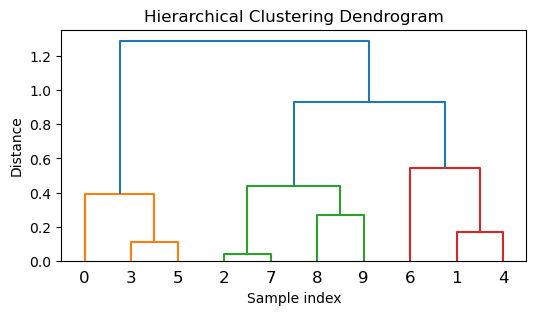

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(10, 2)

# Perform hierarchical clustering
Z = linkage(X, 'ward')

# Plot dendrogram
plt.figure(figsize=(6, 3))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- Groups together points that are closely packed, marking as outliers points that lie alone in low-density regions.
- Does not require specifying the number of clusters.
- Can find arbitrarily shaped clusters and is robust to outliers.

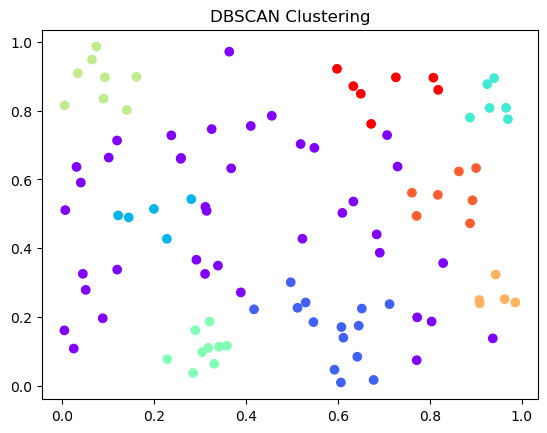

In [7]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.random.rand(100, 2)

# Apply DBSCAN
db = DBSCAN(eps=0.1, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()

#### Gaussian Mixture Models (GMM)
- Assumes data is generated from a mixture of several Gaussian distributions.
- Can model elliptical clusters and provides soft assignments (probabilities).
- Useful for density estimation as well as clustering.

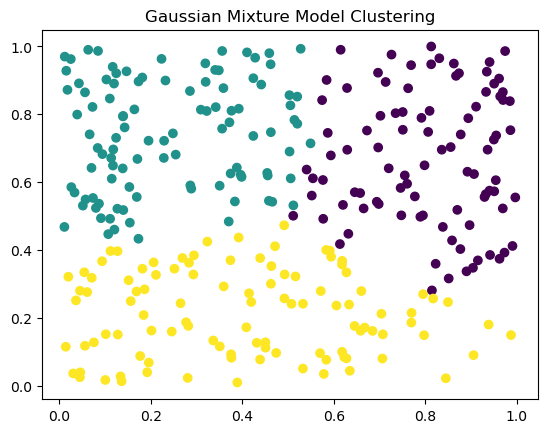

In [8]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.random.rand(300, 2)

# Fit GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

---

## Proximity Indices

It is used to quantify the strength of relationship between any two feature vectors.
- Continuous-valued features
    - e.g. x = (0.1, 11, 15, 1.5), measure the `distance` between any two values

### Euclidean distance
It measures the shortest straight-line distance between two points in n-dimensional space. Think of it as applying the Pythagorean theorem in multiple dimensions.

$D_{\text{euclidean}}(a, b) = \sqrt{ \sum_{i=1}^{n} (a_i - b_i)^2 }$

In [9]:
import numpy as np

def euclidean_distance(a, b):
    a, b = np.array(a), np.array(b)
    return np.sqrt(np.sum((a - b) ** 2))

### Manhattan Distance

Also called L1 norm. It's like how a taxi would drive in a grid-like city: only moving horizontally or vertically.

$D_{\text{manhattan}}(a, b) = \sum_{i=1}^{n} |a_i - b_i|$

In [10]:
def manhattan_distance(a, b):
    a, b = np.array(a), np.array(b)
    return np.sum(np.abs(a - b))

### Chebyshev Distance
Measures the greatest difference along any single coordinate. Useful in scenarios where movement in any one direction dominates the cost:

$D_{\text{chebyshev}}(a, b) = \max_{i=1}^{n} |a_i - b_i|$

In [11]:
def chebyshev_distance(a, b):
    a, b = np.array(a), np.array(b)
    return np.max(np.abs(a - b))

### Hamming Distance

The Hamming distance between two equal-length strings (or arrays) is the number of positions at which the corresponding symbols are different.

If $a$ and $b$ are two vectors of length $n$:

$D_{\text{hamming}}(a, b) = \sum_{i=1}^{n} \mathbb{1}(a_i \neq b_i)$

Where $\mathbb{1}$ is an indicator function that returns 1 if the values differ, and 0 if they're the same.

Works best with:
- Binary vectors (e.g. [0, 1, 1, 0])
- Strings (e.g. "karolin" vs "kathrin")

### Hamming Distance Matrix

A Hamming distance matrix is a symmetric matrix showing the pairwise Hamming distances between multiple vectors.

Example:

Suppose we have these binary vectors:
```
A = [1, 0, 1, 1]
B = [1, 1, 0, 1]
C = [0, 0, 1, 0]
```
Then the Hamming distance matrix is:
```
	A	B	C
A	0	2	2
B	2	0	3
C	2	3	0
```
Each value is the number of differing bits between the row and column vectors.

In the example below, scipy.spatial.distance.hamming returns the normalized distance (a proportion), so multiply by vector length to get the raw count.

In [12]:
from scipy.spatial.distance import hamming
import numpy as np

# Binary data
X = np.array([
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 0, 1, 0]
])

# Compute pairwise Hamming distances
n = len(X)
hamming_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        hamming_matrix[i, j] = hamming(X[i], X[j]) * X.shape[1]  # multiply to get actual distance

print(hamming_matrix)

[[0. 2. 2.]
 [2. 0. 4.]
 [2. 4. 0.]]


    [[0. 2. 2.]
     [2. 0. 4.]
     [2. 4. 0.]]

---

## K-Means (Example)

- Initializes k random centroids.
- Assigns each point to the nearest centroid.
- Recomputes centroids based on assignments.
- Repeats until convergence.

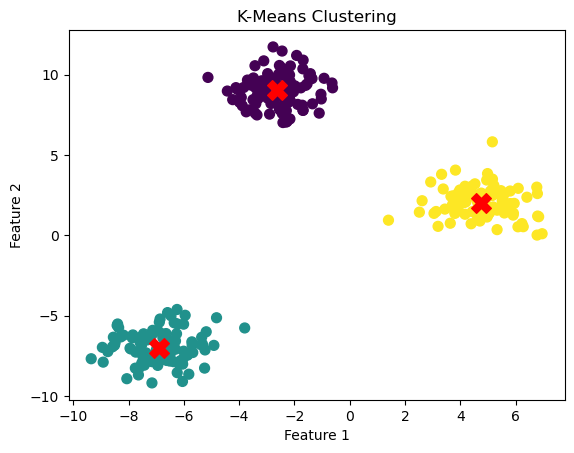

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data: 3 clusters in 2D
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Dimensionality Reduction

Dimensionality reduction techniques transform high-dimensional data into a lower-dimensional space, preserving as much information as possible. This is useful for visualization, noise reduction, and speeding up downstream algorithms.

### Principal Component Analysis (PCA)
- Linear technique that projects data onto directions (principal components) of maximum variance.
- Useful for visualization and noise reduction.

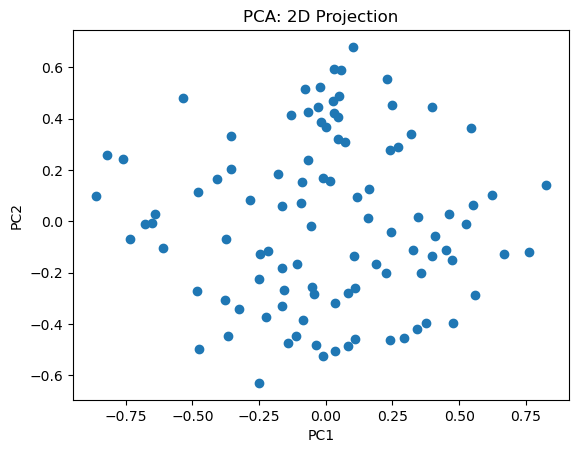

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA: 2D Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### t-SNE (t-distributed Stochastic Neighbor Embedding)
- Nonlinear technique for visualizing high-dimensional data in 2 or 3 dimensions.
- Preserves local structure, good for visualizing clusters.

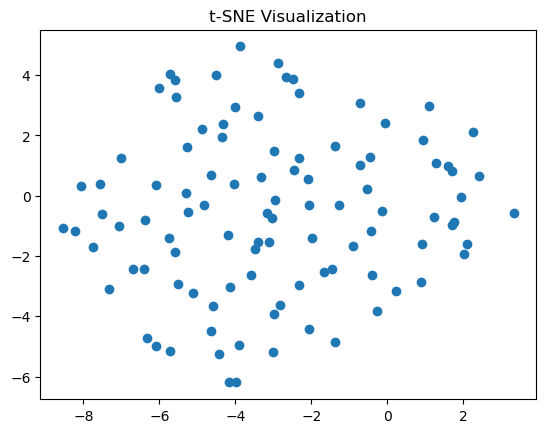

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 10)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE Visualization')
plt.show()

### UMAP (Uniform Manifold Approximation and Projection)
- Nonlinear technique for dimension reduction and visualization.
- Preserves both local and global structure better than t-SNE in many cases.

/opt/anaconda3/envs/ml_study/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/ml_study/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


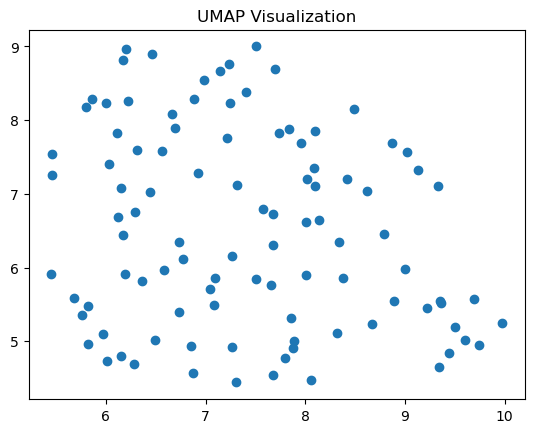

In [16]:
import umap
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 10)

# UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.title('UMAP Visualization')
plt.show()

---

## Evaluation Metrics

### Clustering Evaluation
- **Silhouette Score:** Measures how similar an object is to its own cluster compared to other clusters. Ranges from -1 to 1 (higher is better).
- **Davies-Bouldin Index:** Lower values indicate better clustering.
- **Adjusted Rand Index, Mutual Information:** For comparing clustering to ground truth (if available).

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Now X and labels both have 300 samples
# X: data, labels: cluster assignments
score = silhouette_score(X, labels)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.85


### Dimensionality Reduction Evaluation
- **Explained Variance (PCA):** How much variance is captured by the selected components.
- **Visualization:** Plotting the reduced data to see if clusters or structure are preserved.

---

## Feature Scaling

Feature scaling is the process of transforming your input variables (features) so they're on a similar scale.

For example:
- Raw feature values: [age: 25, salary: 90,000, height: 180]
- After scaling, these might become: [0.2, 0.8, 0.7]

### Why Do We Need Feature Scaling?
Many ML algorithms assume features are on the same scale -- if they're not, you could
- Biased models (some features dominate because they have larger values)
- Slower convergence in gradient-based algorithms
- Incorrect distance calculations (in k-NN, k-means, SVM, etc.)

Algorithms that care about scale:
- k-NN
- k-Means
- SVM
- PCA
- Logistic/Linear Regression (with regularization)
- Neural Networks

### Min-Max Normalization (Rescaling)

Scales values to a fixed range, usually [0, 1].

Formula:

$x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$

Example:
If height is 150–200 cm and someone is 180 cm:

$\frac{180 - 150}{200 - 150} = \frac{30}{50} = 0.6$

Pros:
- Preserves shape of original distribution
- Keeps everything in a bounded range

Cons:
- Sensitive to outliers (they can squash everything else)

### Z-score Standardization (Standard Scaling)

Centers the feature around 0 with unit variance -- useful when data is approximately Gaussian.

Formula:

$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$

Where:
- $\mu$ = mean of the feature
- $\sigma$ = standard deviation of the feature

Example:
If the mean age is 40 and std is 10, a 30-year-old becomes:

$\frac{30 - 40}{10} = -1$

Pros:
- Not bounded, but handles outliers better than min-max
- Great for algorithms assuming Gaussian input (like linear models, logistic regression, PCA)

---

## Real-World Applications of Unsupervised Learning
- **Customer Segmentation:** Grouping customers by purchasing behavior for targeted marketing.
- **Document Clustering:** Organizing news articles or research papers by topic.
- **Image Compression:** Reducing image size by extracting key features.
- **Anomaly Detection:** Identifying fraudulent transactions or network intrusions.
- **Recommender Systems:** Finding similar users or items for personalized recommendations.
- **Genomics:** Discovering subtypes of diseases from gene expression data.

---

## Visualization Tips
- Use scatter plots for 2D/3D projections (PCA, t-SNE, UMAP) to inspect clusters.
- Color points by cluster label or known class (if available).
- Use dendrograms for hierarchical clustering.
- For high-dimensional data, try pair plots or parallel coordinates.

---

## References & Further Reading
- [scikit-learn: Unsupervised learning](https://scikit-learn.org/stable/unsupervised_learning.html)
- [An Introduction to Statistical Learning](https://www.statlearning.com/)
- [Pattern Recognition and Machine Learning by Bishop]
- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron]
- [Distill.pub: Visual essays on ML](https://distill.pub/)